# 🛠 Exercises

## 0. Prerequisites

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [2]:
# get helper functions
!wget https://raw.githubusercontent.com/yhs2773/TensorFlow-for-Deep-Learning/main/helper_functions.py

from helper_functions import unzip_data

--2023-12-23 11:38:20--  https://raw.githubusercontent.com/yhs2773/TensorFlow-for-Deep-Learning/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11093 (11K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.83K  --.-KB/s    in 0s      

2023-12-23 11:38:21 (59.2 MB/s) - ‘helper_functions.py’ saved [11093/11093]



In [3]:
# download and unzip data
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

unzip_data("nlp_getting_started.zip")

--2023-12-23 11:38:21--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.207, 142.250.4.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K   721KB/s    in 0.8s    

2023-12-23 11:38:22 (721 KB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [4]:
# load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [5]:
# split train data into train and validation
train_sen, val_sen, train_label, val_label = train_test_split(train_df['text'],
                                                              train_df['target'],
                                                              test_size=0.1,
                                                              random_state=42)

## 1. Rebuild, compile, and train `model_1`, `model_2`, and `model_5` using the [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) instead of the Functional API.

In [6]:
# text vectorizer
text_vectorizer = tf.keras.layers.TextVectorization(max_tokens = 10000, output_sequence_length = 15)

# fit text vectorizer with the train text
text_vectorizer.adapt(train_sen)

In [7]:
# model 1 with new embedding
model_1_embedding = tf.keras.layers.Embedding(input_dim=10000,
                                              output_dim=128,
                                              input_length=15)

# build
model_1 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,), dtype='string'),
    text_vectorizer,    # with Sequential API, just use variables
    model_1_embedding,  # with Sequential API, just use variables
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# compile
model_1.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# train
history_1 = model_1.fit(train_sen,
                        train_label,
                        epochs=5,
                        validation_data=(val_sen, val_label))

Epoch 1/5
215/215 [==============================] - 24s 80ms/step - loss: 0.6101 - accuracy: 0.7088 - val_loss: 0.5449 - val_accuracy: 0.7638
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.4410 - accuracy: 0.8124 - val_loss: 0.4848 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3461 - accuracy: 0.8622 - val_loss: 0.4764 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 1s 7ms/step - loss: 0.2827 - accuracy: 0.8933 - val_loss: 0.4845 - val_accuracy: 0.7835
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2360 - accuracy: 0.9140 - val_loss: 0.5013 - val_accuracy: 0.7861


In [8]:
# model 2 with new embedding
model_2_embedding = tf.keras.layers.Embedding(input_dim=10000,
                                              output_dim=128,
                                              input_length=15)

# build model
model_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype='string'),
    text_vectorizer,
    model_2_embedding,
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile
model_2.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# train
history_2 = model_2.fit(train_sen,
                        train_label,
                        epochs=5,
                        validation_data=(val_sen, val_label))

Epoch 1/5
215/215 [==============================] - 11s 40ms/step - loss: 0.5096 - accuracy: 0.7466 - val_loss: 0.4664 - val_accuracy: 0.7887
Epoch 2/5
215/215 [==============================] - 2s 11ms/step - loss: 0.3129 - accuracy: 0.8736 - val_loss: 0.4905 - val_accuracy: 0.8018
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.2130 - accuracy: 0.9194 - val_loss: 0.6374 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 10ms/step - loss: 0.1436 - accuracy: 0.9482 - val_loss: 0.7132 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0933 - accuracy: 0.9639 - val_loss: 0.8965 - val_accuracy: 0.7480


In [9]:
# model 5 with embedding
model_5_embedding = tf.keras.layers.Embedding(input_dim=10000,
                                              output_dim=128,
                                              input_length=15)

# build
model_5 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype='string'),
    text_vectorizer,
    model_5_embedding,
    tf.keras.layers.Conv1D(filters=32, kernel_size=5, activation='relu'),
    tf.keras.layers.MaxPool1D(),
    tf.keras.layers.GlobalMaxPool1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile
model_5.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])

# train
history_5 = model_5.fit(train_sen,
                        train_label,
                        epochs=5,
                        validation_data=(val_sen, val_label))

Epoch 1/5
215/215 [==============================] - 10s 34ms/step - loss: 0.5599 - accuracy: 0.7202 - val_loss: 0.4822 - val_accuracy: 0.7861
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3367 - accuracy: 0.8640 - val_loss: 0.5047 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 3s 16ms/step - loss: 0.2095 - accuracy: 0.9223 - val_loss: 0.5722 - val_accuracy: 0.7625
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1359 - accuracy: 0.9552 - val_loss: 0.6887 - val_accuracy: 0.7677
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.0935 - accuracy: 0.9708 - val_loss: 0.7344 - val_accuracy: 0.7651


## 2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?

In [10]:
# import libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [11]:
# split train data into 90% and 10%
train_90_sen, train_10_sen, train_90_label, train_10_label = train_test_split(train_sen,
                                                                              train_label,
                                                                              test_size=0.1,
                                                                              random_state=42)

In [12]:
# baseline model
model_0 = Pipeline([
    ['tfidf', TfidfVectorizer()],
    ['clf', MultinomialNB()]
])

# train
model_0.fit(train_10_sen, train_10_label)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ['clf', MultinomialNB()]])

In [13]:
# predict
base_pred = model_0.predict(val_sen)

In [14]:
# function to get metrics
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    results = {"accuracy": accuracy,
               "precision": precision,
               "recall": recall,
               "f1": f1}
    return results

In [15]:
calculate_results(y_true=val_label,
                  y_pred=base_pred)

{'accuracy': 0.7165354330708661,
 'precision': 0.751881230363446,
 'recall': 0.7165354330708661,
 'f1': 0.6941582093397392}

`model_7` (USE model with 10% train data) scored 0.78 on accuracy, precision, and recall and 0.77 on f1.

So overall `model_7` scored higher than `model_0` when trained on 10% train data.

## 3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting `training=True` when instantiating it as a Keras layer.
```
We can use this encoding layer in place of our text_vectorizer and embedding layer

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model
```

In [16]:
# USE layer
import tensorflow_hub as hub

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True)

In [17]:
# build
model_6_fine_tune = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile
model_6_fine_tune.compile(optimizer='adam',
                          loss='binary_crossentropy',
                          metrics=['accuracy'])

# train
history_6_fine_tune = model_6_fine_tune.fit(train_sen,
                                            train_label,
                                            epochs=5,
                                            validation_data=(val_sen, val_label))

Epoch 1/5
215/215 [==============================] - 129s 453ms/step - loss: 0.4480 - accuracy: 0.8032 - val_loss: 0.4367 - val_accuracy: 0.8071
Epoch 2/5
215/215 [==============================] - 29s 134ms/step - loss: 0.2371 - accuracy: 0.9102 - val_loss: 0.4660 - val_accuracy: 0.7927
Epoch 3/5
215/215 [==============================] - 25s 115ms/step - loss: 0.0844 - accuracy: 0.9726 - val_loss: 0.5633 - val_accuracy: 0.7966
Epoch 4/5
215/215 [==============================] - 25s 116ms/step - loss: 0.0411 - accuracy: 0.9851 - val_loss: 0.6671 - val_accuracy: 0.7782
Epoch 5/5
215/215 [==============================] - 22s 101ms/step - loss: 0.0305 - accuracy: 0.9883 - val_loss: 0.6840 - val_accuracy: 0.7940


In [18]:
# get prediction probabilities
model_6_pred_prob = model_6_fine_tune.predict(val_sen)

24/24 [==============================] - 1s 9ms/step


In [19]:
# get predictions
model_6_pred = tf.squeeze(tf.round(model_6_pred_prob))

In [20]:
# get metrics
calculate_results(val_label, model_6_pred)

{'accuracy': 0.7939632545931758,
 'precision': 0.7940650788870766,
 'recall': 0.7939632545931758,
 'f1': 0.7924844199917838}

Metrics were 0.82 for accuracy, precision, and recall and 0.81 for f1 without fine-tuning USE (`model_6` from chapter 8).

Seems like the best model is the pre-trained USE model.

## 4. Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the `sample_submission.csv` file from Kaggle (see the Files tab in Colab for what the `sample_submission.csv` file looks like). Once you've done this, [submit it to the Kaggle competition](https://www.kaggle.com/c/nlp-getting-started/data), how did your model perform?

In [21]:
# pre-trained USE
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=False)

# build
final_model = tf.keras.Sequential([
    sentence_encoder_layer,
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
y_pred_prob = final_model.predict(test_df['text'])
y_pred = tf.squeeze(tf.round(y_pred_prob))

102/102 [==============================] - 1s 9ms/step


In [23]:
submission = pd.read_csv("sample_submission.csv")
submission

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [24]:
submission['target'] = y_pred.numpy()

In [25]:
# need int type instead of float type for the target column
submission['target'] = submission['target'].astype(int)
submission

,id,target
0,0,1
1,2,0
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,0


In [26]:
submission.to_csv('submission.csv', index=False)

Scored 0.4266 in Kaggle

## 5. Combine the ensemble predictions using the majority vote (mode), how does this perform compared to averaging the prediction probabilities of each model?

In [27]:
# predict with model 2
model_2_pred_prob = model_2.predict(val_sen)
model_2_pred = tf.squeeze(tf.round(model_2_pred_prob))

24/24 [==============================] - 1s 3ms/step


In [28]:
# predict with model 6 (pre-trained USE)
model_6_pred_prob = final_model.predict(val_sen)
model_6_pred = tf.squeeze(tf.round(model_6_pred_prob))

24/24 [==============================] - 0s 10ms/step


In [29]:
model_6_pred_prob.shape

(762, 1)

In [30]:
# combine predictions
all_predictions = [base_pred, model_2_pred.numpy().astype(int), model_6_pred.numpy().astype(int)]
all_predictions = np.array(all_predictions)
all_predictions.shape

(3, 762)

In [31]:
# getting the mode of the predictions
from scipy.stats import mode

hard_vote_preds, _ = mode(all_predictions, axis=0)
hard_vote_preds, len(hard_vote_preds)

(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 

In [32]:
calculate_results(val_label, hard_vote_preds)

{'accuracy': 0.7309711286089239,
 'precision': 0.7323911056837527,
 'recall': 0.7309711286089239,
 'f1': 0.7261016112563629}

Hard voting ensemble result is lower than the pre-trained USE model.

In [33]:
# If meant to be put into a function
def hard_voting(predictions):
    """
    Perform hard voting ensembling.

    Parameters:
    - predictions: List of arrays, each array containing the predictions of a model.

    Returns:
    - ensembled_predictions: Array containing the ensembled predictions.
    """
    # Convert the predictions to numpy arrays for easy manipulation
    predictions = np.array(predictions)

    # Take the mode along the axis 1 to get the majority vote for each sample
    ensembled_predictions, _ = mode(predictions, axis=0)

    return ensembled_predictions

# Example usage:
model1_predictions = np.array([0, 0, 1, 1, 0])
model2_predictions = np.array([1, 0, 1, 1, 1])
model3_predictions = np.array([0, 1, 0, 1, 0])

all_predictions = [model1_predictions, model2_predictions, model3_predictions]

# Perform hard voting ensembling
ensembled_predictions = hard_voting(all_predictions)

# Now, 'ensembled_predictions' contains the final ensembled predictions
print(ensembled_predictions)

[0 0 1 1 0]


## 6. Make a confusion matrix with the best-performing model's predictions on the validation set and the validation ground truth labels.

In [34]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_label, model_6_pred)

array([[145, 281],
       [127, 209]])

In [35]:
ca = confusion_matrix(val_label, model_6_pred)

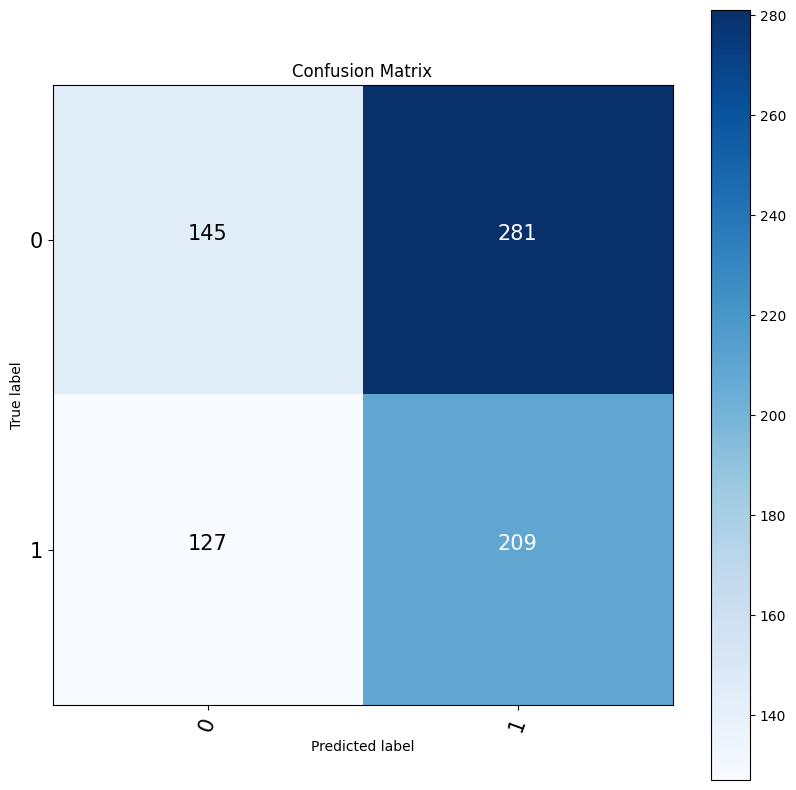

In [36]:
from helper_functions import make_confusion_matrix

make_confusion_matrix(val_label, model_6_pred)

# 📖 Extra-curriculum

To practice what you've learned, a good idea would be to spend an hour on 3 of the following (3-hours total, you could go through them all if you want) and then write a blog post about what you've learned.

- For an overview of the different problems within NLP and how to solve them read through the following:
    - [A Simple Introduction to Natural Language Processing](https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32)
    - [How to solve 90% of NLP problems: a step-by-step guide](https://blog.insightdatascience.com/how-to-solve-90-of-nlp-problems-a-step-by-step-guide-fda605278e4e)
- Go through [MIT's Recurrent Neural Networks lecture](https://youtu.be/SEnXr6v2ifU). This will be one of the greatest additions to what's happening behind the RNN models you've been building.
- Read through the [word embeddings page on the TensorFlow website](https://www.tensorflow.org/tutorials/text/word_embeddings). Embeddings are such a large part of NLP. We've covered them throughout this notebook but extra practice would be well worth it. A good exercise would be to write out all the code in the guide in a new notebook.
- For more on RNNs in TensorFlow, read and reproduce the [TensorFlow RNN guide](https://www.tensorflow.org/guide/keras/rnn). We've covered many of the concepts in this guide, but it's worth writing the code again for yourself.
- Text data doesn't always come in a nice package like the data we've downloaded. So if you're after more on preparing different text sources for being with your TensorFlow deep learning models, it's worth checking out the following:
    - [TensorFlow text loading tutorial](https://www.tensorflow.org/tutorials/load_data/text)
    - [Reading text files with Python](https://realpython.com/read-write-files-python/) by Real Python.
- This notebook has focused on writing NLP code. For a mathematically rich overview of how NLP with Deep Learning happens, read [Standford's Natural Language Processing with Deep Learning lecture notes Part 1](https://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf).
    - For an even deeper dive, you could even do the whole [CS224n](http://web.stanford.edu/class/cs224n/) (Natural Language Processing with Deep Learning) course.
- Great blog posts to read:
    - Andrei Karpathy's [The Unreasonable Effectiveness of RNNs](https://karpathy.github.io/2015/05/21/rnn-effectiveness/) dives into generating Shakespeare text with RNNs.
    - [Text Classification with NLP: Tf-Idf vs Word2Vec vs BERT](https://towardsdatascience.com/text-classification-with-nlp-tf-idf-vs-word2vec-vs-bert-41ff868d1794) by Mauro Di Pietro. An overview of different techniques for turning text into numbers and then classifying it.
    - [What are word embeddings?](https://machinelearningmastery.com/what-are-word-embeddings/) by Machine Learning Mastery.
- Other topics worth looking into:
    - [Attention mechanisms](https://jalammar.github.io/visualizing-neural-machine-translation-mechanics-of-seq2seq-models-with-attention/). These are a foundational component of the transformer architecture and also often add improvements to deep NLP models.
    - [Transformer architectures](http://jalammar.github.io/illustrated-transformer/). This model architecture has recently taken the NLP world by storm, achieving state-of-the-art on many benchmarks. However, it does take a little more processing to get off the ground, so the [HuggingFace Models (formerly HuggingFace Transformers) library](https://huggingface.co/models/) is probably your best quick start.
        - And now [HuggingFace even have their course](https://huggingface.co/course/chapter1) on how their library works! I haven't done it but anything HuggingFace makes is world-class.